# Import Library

In [615]:
# Olah Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [616]:
# Path 
allDietsDfPath = 'data/All_Diets.csv'
allUsersDfPath = 'data/ObesityDataSet_cleaned_and_data_sinthetic.csv'

# Dataset
allDietsDf = pd.read_csv(allDietsDfPath)
allUsersDf = pd.read_csv(allUsersDfPath)


In [617]:
allDietsDf.sample(10)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
6578,dash,Roasted Cedar-Plank Salmon with Mustard-Maple ...,nordic,149.32,77.47,41.86,2022-10-16,20:32:37
4132,keto,Keto Protein Desserts: Made With your Favourit...,american,28.08,9.29,18.37,2022-10-16,18:08:10
3106,keto,Keto Cuban Sandwich,caribbean,143.61,59.18,229.70,2022-10-16,18:00:30
5925,mediterranean,Mediterranean-style prawns,mediterranean,151.49,92.26,50.03,2022-10-16,16:52:39
2136,vegan,Banana-Coconut Cake Recipe,caribbean,55.36,1063.72,621.42,2022-10-16,20:09:03
3191,keto,Keto Chicken Pesto Burgers,american,131.09,14.73,107.32,2022-10-16,18:01:10
4164,keto,"Baked Tuna Melt Jalapeño Poppers (Keto, Gluten...",mexican,294.53,187.42,280.90,2022-10-16,18:08:24
4717,mediterranean,Mediterranean Feta Salad With Pomegranate Dres...,mediterranean,51.84,175.52,195.42,2022-10-16,16:45:30
5299,mediterranean,Mediterranean fritters,mediterranean,41.31,137.53,44.65,2022-10-16,16:48:58
5881,mediterranean,Mediterranean Marinated Chicken,mediterranean,103.28,5.78,84.19,2022-10-16,16:52:19


In [618]:
allUsersDf.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,female,21,1.62,64,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,0,3 to 5,no,public_transportation,normal_weight,24.386526
1,2,female,21,1.52,56,yes,no,always,3,sometimes,yes,more than 2 l,yes,4 to 5,0 to 2,sometimes,public_transportation,normal_weight,24.238227
2,3,male,23,1.80,77,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,public_transportation,normal_weight,23.765432
3,4,male,27,1.80,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
4,5,male,22,1.78,90,no,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_ii,28.342381


# Data Assessing

In [619]:
# Cek shape dataset tipe diet
allDietsDf.shape

(7806, 8)

In [620]:
# Cek shape dataset users
allUsersDf.shape

(2111, 19)

## Informasi Umum

### Dataset Diet

In [621]:
allDietsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB


### Dataset *Users*

In [622]:
allUsersDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   int64  
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

## Cek Data Null

### Dataset Diet

In [623]:
allDietsDf.isna().sum()

Diet_type          0
Recipe_name        0
Cuisine_type       0
Protein(g)         0
Carbs(g)           0
Fat(g)             0
Extraction_day     0
Extraction_time    0
dtype: int64

### Dataset *Users*

In [624]:
allUsersDf.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64

## Cek Data Duplikat

### Dataset Diet

In [625]:
allDietsDf.duplicated().sum()

5

### Dataset *Users*

In [626]:
allUsersDf.duplicated().sum()

0

## Nilai Statistik Dataset

### Dataset Diet

In [627]:
allDietsDf.describe()

,Protein(g),Carbs(g),Fat(g)
count,7806.000000,7806.000000,7806.000000
mean,83.231498,152.123189,117.328542
std,89.797282,185.907322,122.098117
min,0.000000,0.060000,0.000000
25%,24.415000,36.162500,41.067500
50%,56.280000,93.415000,84.865000
75%,112.357500,205.915000,158.290000
max,1273.610000,3405.550000,1930.240000


### Dataset *Users*

In [628]:
allUsersDf.describe()

,Age,Height,Weight,NCP,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.588820,2.687826,29.700159
std,6.357078,0.093305,26.188572,0.809680,8.011337
min,14.000000,1.450000,39.000000,1.000000,12.998685
25%,20.000000,1.630000,65.500000,3.000000,24.325802
50%,23.000000,1.700499,83.000000,3.000000,28.719089
75%,26.000000,1.768464,107.000000,3.000000,36.016501
max,61.000000,1.980000,173.000000,4.000000,50.811753


Dari hasil analisa pada tahap **Data Assessing** kesimpulannya adalah:
1. Dataset Diet
   - Tidak terdapat kesalahan tipe data kolom
   - Tidak terdapat nilai *null*
   - Terdapat **5** data duplikat

Catatan:
Terdapat nilai 0 pada kolom **Protein(g)**, dan **Fat(g)** dari hasil eksekusi perintah *describe* yang perlu ditinjau ulang pada tahap **EDA**.
 
2. Dataset *Users*
   - Terdapat kesalahan tipe data pada kolom **Weight**, seharusnya *float* bukan *integer*
   - Tidak terdapat nilai *null*
   - Tidak terdapat data duplikat


# Data Cleaning

## Hapus Data Duplikat Dataset Diet

Penghapusan data duplikat pada dataset diet dilakukan secara langsung karena jumlahnya yang tergolong kecil dibanding total banyak data yang ada.

In [629]:
allDietsDf.shape

(7806, 8)

In [630]:
allDietsDf.drop_duplicates(inplace=True)

In [631]:
allDietsDf.shape

(7801, 8)

Saat ini pada dataset diet sudah tidak ada data duplikat

## Ubah Tipe Data Kolom Weight Dataset *Users*

In [632]:
allUsersDf['Weight'] = allUsersDf.Weight.astype(float)

Saat ini, kolom **Weight** sudah berubah tipe data menjadi *float* dari yang semula *integer*.

# Exploratory Data Analysis (EDA)

## Deskripsi Variabel

### Data Diet

In [633]:
# Informasi dataset diet
allDietsDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7801 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7801 non-null   object 
 1   Recipe_name      7801 non-null   object 
 2   Cuisine_type     7801 non-null   object 
 3   Protein(g)       7801 non-null   float64
 4   Carbs(g)         7801 non-null   float64
 5   Fat(g)           7801 non-null   float64
 6   Extraction_day   7801 non-null   object 
 7   Extraction_time  7801 non-null   object 
dtypes: float64(3), object(5)
memory usage: 548.5+ KB


In [634]:
# Informasi dataset users
allUsersDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   float64
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

### Data *Users*

1. Id: Kolom index
2. BMI (*Body Mass Index*): Indeks masa tubuh ideal (target)
3. Gender: Jenis Kelamin 
4. Age: Umur
5. Height: Tinggi badan (inch)
6. Weight: Berat badan (kg)
7. family_history_with_overweight: Riwayat keluarga dengan berat badan berlebih (obesitas)
8. FAVC: Frekuensi mengkonsumsi makanan tinggi kalori
9.  FCVC: Frekuensi mengkonsumsi sayur-mayur
10. NCP: Jumlah makan pokok perhari
11. CAEC: Frekuensi makan cemilan
12. SMOKE: Kebiasaan merokok
13. CH2O: Jumlah minum air
14. SCC: Kebiasaan monitoring konsumsi kalori
15. FAF: Frekuensi kegiatan fisik
16. TUE: Waktu penggunaan perangkat (jam)
17. CALC: Frekuensi mengkonsumsi alkohol
18. MTRANS: Kategori transportasi yang digunakan
19. NObeyesdad: Kategori berat badan

Untuk uraian lebih lanjut adalah sebagai berikut:
- Terdapat 14 kolom dengan tipe data object, yaitu Id, Gender, family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
- Terdapat 2 kolom dengan tipe data integer, yaitu Age dan NCP
- Terdapat 3 kolom dengan tipe data float, Height, Weight, dan BMI

## Menghapus Kolom yang Tidak Perlu
### Dataset Diet

In [635]:
allDietsDf = allDietsDf[['Diet_type', 'Recipe_name', 'Cuisine_type', 'Protein(g)', 'Carbs(g)', 'Fat(g)']]

allDietsDf.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55


### Dataset *Users*

In [636]:
allUsersDf = allUsersDf[['id', 'BMI','Weight',  'Gender', 'Age', 'NObeyesdad', 'family_history_with_overweight']]

allUsersDf.head()

,id,BMI,Weight,Gender,Age,NObeyesdad,family_history_with_overweight
0,1,24.386526,64.0,female,21,normal_weight,yes
1,2,24.238227,56.0,female,21,normal_weight,yes
2,3,23.765432,77.0,male,23,normal_weight,yes
3,4,26.851852,87.0,male,27,overweight_level_i,no
4,5,28.342381,90.0,male,22,overweight_level_ii,no


## Cek Nilai *Unique* dan *Invalid Value* Kolom Kategorikal
### Data Diet

Diet_type

In [637]:
print('Jumlah nilai unik adalah', allDietsDf.Diet_type.nunique())
print('Uraian nilai unik: \n', allDietsDf.Diet_type.unique())

Jumlah nilai unik adalah 5
Uraian nilai unik: 
 ['paleo' 'vegan' 'keto' 'mediterranean' 'dash']


Cuisine_type

In [638]:
print('Jumlah nilai unik adalah', allDietsDf.Cuisine_type.nunique())
print('Uraian nilai unik: \n', allDietsDf.Cuisine_type.unique())

Jumlah nilai unik adalah 19
Uraian nilai unik: 
 ['american' 'south east asian' 'mexican' 'chinese' 'mediterranean'
 'italian' 'french' 'indian' 'nordic' 'eastern europe' 'central europe'
 'kosher' 'british' 'caribbean' 'south american' 'middle eastern' 'asian'
 'japanese' 'world']


Kesimpulan yang didapatkan adalah:
- **Tidak ada *invalid value*** pada kolom kategorikal di data diet.

### Data *Users*

Gender

In [639]:
print('Jumlah nilai unik adalah', allUsersDf.Gender.nunique())
print('Uraian nilai unik: \n', allUsersDf.Gender.unique())

Jumlah nilai unik adalah 2
Uraian nilai unik: 
 ['female' 'male']


family_history_with_overweight

In [640]:
print('Jumlah nilai unik adalah', allUsersDf.family_history_with_overweight.nunique())
print('Uraian nilai unik: \n', allUsersDf.family_history_with_overweight.unique())

Jumlah nilai unik adalah 2
Uraian nilai unik: 
 ['yes' 'no']


NObeyesdad

In [641]:
print('Jumlah nilai unik adalah', allUsersDf.NObeyesdad.nunique())
print('Uraian nilai unik: \n', allUsersDf.NObeyesdad.unique())

Jumlah nilai unik adalah 7
Uraian nilai unik: 
 ['normal_weight' 'overweight_level_i' 'overweight_level_ii'
 'obesity_type_i' 'insufficient_weight' 'obesity_type_ii'
 'obesity_type_iii']


Kesimpulan yang didapatkan adalah:
- **Tidak ada *invalid value*** pada kolom kategorikal di data *users*.

## Cek Invalid Value Kolom Numerik

### Data Diet

Protein(g)

In [642]:
print((allDietsDf['Protein(g)'] <= 0).sum())

17


Carbs(g)

In [643]:
print((allDietsDf['Carbs(g)'] <= 0).sum())

0


Fat(g)

In [644]:
print((allDietsDf['Fat(g)'] <= 0).sum())

38


Kesimpulan yang didapatkan adalah:
- Terdapat **17** data protein yang nilainya kurang dari 0. Yang perlu dilakukan adalah **menghapus** data-data itu, bertujuan untuk memberikan rekomendasi makanan dengan nilai gizi yang cukup.
- Terdapat **38** data lemak yang nilainya kurang dari 0. Yang perlu dilakukan adalah **mempertahankan** data-data itu, sebab kondisi itu diartikan makanan-makanan itu rendah lemak dan baik untuk dikonsumsi.

In [645]:
'''
Penghapusan nilai protein yang kurang dari
atau sama dengan 0 
'''
allDietsDf = allDietsDf[~(allDietsDf['Protein(g)'] <= 0)]

Catatan:
Perlu adanya pemeriksaan *outlier* untuk melihat persebaran data agar mengetahui informasi lebih lanjut.

### Data User

BMI

In [646]:
print((allUsersDf['BMI'] <= 0).sum())

0


Weight

In [647]:
print((allUsersDf['Weight'] <= 0).sum())

0


Age

In [648]:
print((allUsersDf['Age'] <= 0).sum())

0


Kesimpulan yang didapatkan adalah:
- **Tidak ada *invalid value*** pada kolom numerik di data *users*.

Catatan:
Perlu adanya pemeriksaan *outlier* untuk melihat persebaran data agar mengetahui informasi lebih lanjut.

## Cek *Outliers*

### Data Diet

Protein(g)

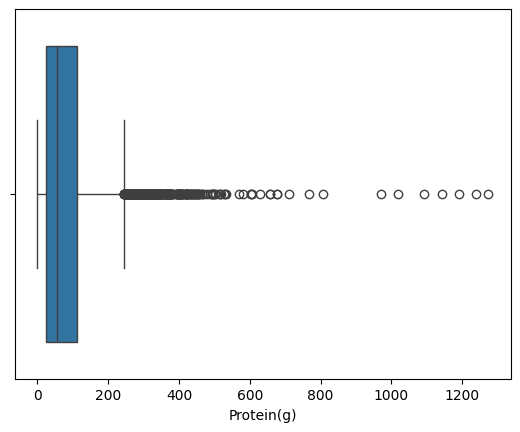

In [649]:
sns.boxplot(x=allDietsDf['Protein(g)'])
plt.savefig('assets/diet/protein1.png')

Carbs(g)

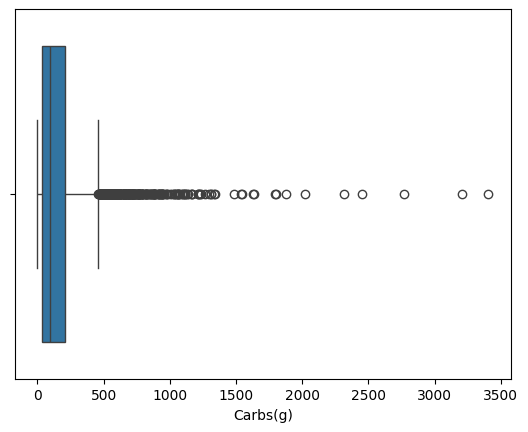

In [650]:
sns.boxplot(x=allDietsDf['Carbs(g)'])
plt.savefig('assets/diet/carbs1.png')

Fat(g)

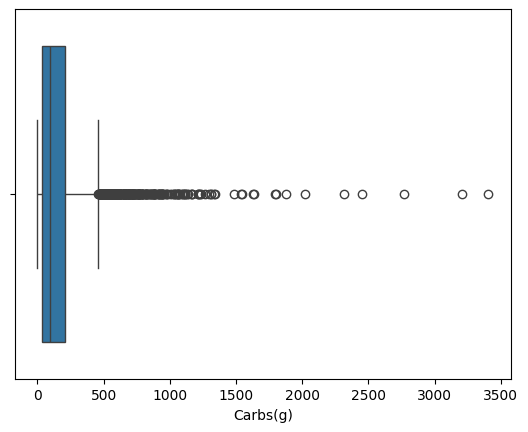

In [651]:
sns.boxplot(x=allDietsDf['Carbs(g)'])
plt.savefig('assets/diet/carbs1.png')

Terdapat banyak nilai yang terindikasi *outliers* pada setiap kolom di atas, hal yang perlu dilakukan adalah peninjauan banyak presentase *outliers* tersebut pada total data. Jika memungkinkan akan dihapus.

### Data *Users*

BMI

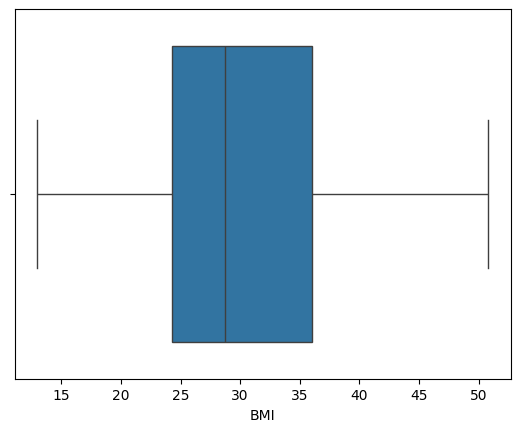

In [652]:
sns.boxplot(x=allUsersDf['BMI'])
plt.savefig('assets/users/bmi1.png')

Weight

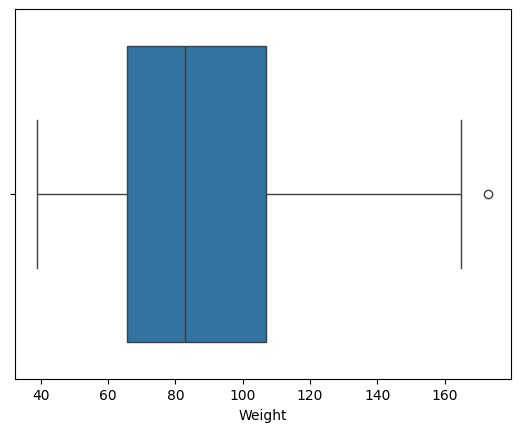

In [653]:
sns.boxplot(x=allUsersDf['Weight'])
plt.savefig('assets/users/weight1.png')

Age

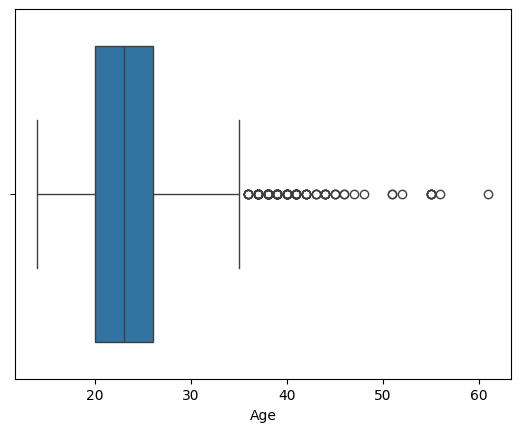

In [654]:
sns.boxplot(x=allUsersDf['Age'])
plt.savefig('assets/users/age1.png')

Terdapat beberapa kesimpulan sebagai berikut:
- Pada kolom **Weight**, banyak data *outlier* ada 1. Sehingga dapat dihapus.
- Pada kolom **Age**, banyak data *outlier* ada banyak. Sehingga perlu peninjauan banyak presentase *outliers* tersebut pada total data. Jika memungkinkan akan dihapus.

## Penanganan *Outliers*

### Rumus IQR

In [655]:
def iqrFormula(data):
    # Mengambil kuartil 1 dari keseluruhan data
    q1 = data.quantile(0.25)
    # Mengambil kuartil 3 dari keseluruhan data
    q3 = data.quantile(0.75)

    # Mengurangkan antara kuartil 1 dan 3
    iqr = q3 - q1

    # Batas atas
    upper = q3 + 1.5 * iqr
    
    # Batas bawah
    bottom = q1 - 1.5 * iqr

    # Rumus outliers
    outliers = ((data < bottom) | (data > upper))
    
    return outliers

### Data Diet

Dari hasil kesimpulan di atas, terdapat beberapa langkah yang harus dilakukan.

In [656]:
# Pengecekan shape data diet
allDietsDf.shape

(7784, 6)

Penerapan Rumus IQR

In [657]:
numericalDiet = allDietsDf.select_dtypes(include=['float64', 'int64'])

outliers = iqrFormula(numericalDiet)


Penghapusan Nilai Outlier

In [658]:
cleanedDiets = allDietsDf[~outliers.any(axis=1)]

In [659]:
cleanedDiets.shape

(6795, 6)

### Data *Users*

In [660]:
allUsersDf.shape

(2111, 7)

Penerapan Rumus IQR


In [661]:
numericalUsers = allUsersDf.select_dtypes(include=['float64', 'int64'])

outliers = iqrFormula(numericalUsers)

Penghapusan Nilai Outliers

In [662]:
cleanedUsers = allUsersDf[~outliers.any(axis=1)]

In [663]:
cleanedUsers.shape

(1950, 7)

## Pengecekan Ulang Nilai Outliers

### Data Diet

Protein(g)

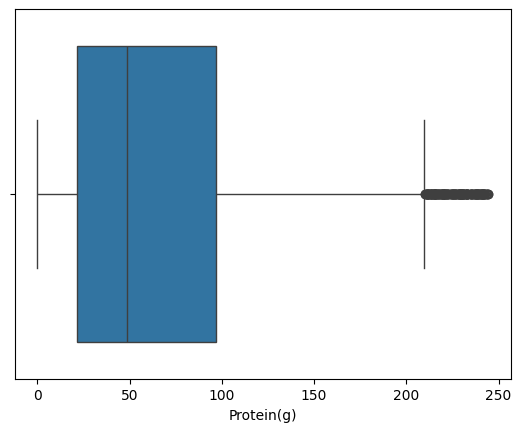

In [664]:
sns.boxplot(x=cleanedDiets['Protein(g)'])
plt.savefig('assets/diet/protein2.png')

Carbs(g)

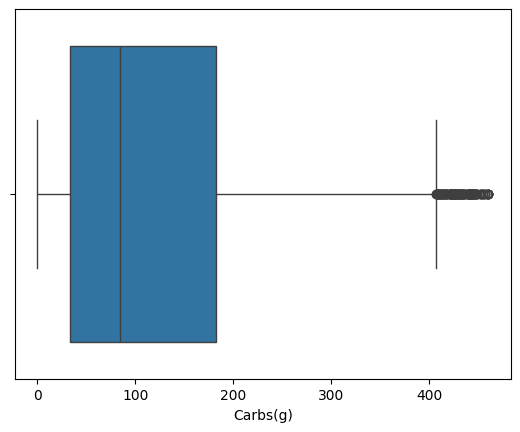

In [665]:
sns.boxplot(x=cleanedDiets['Carbs(g)'])
plt.savefig('assets/diet/carbs2.png')

Fat(g)

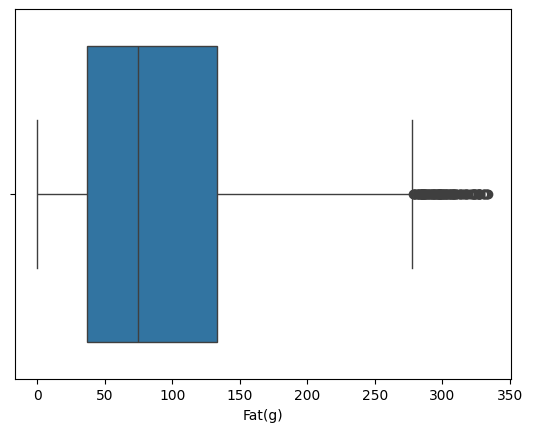

In [666]:
sns.boxplot(x=cleanedDiets['Fat(g)'])
plt.savefig('assets/diet/fat2.png')

Dari hasil cek di atas, masih terdapat beberapa nilai *outliers* di semua kolom. Maka perlu dilakukan penghapusan ulang.

### Data *Users*

BMI

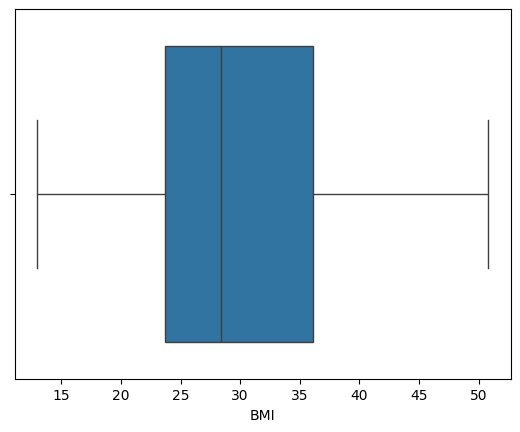

In [667]:
sns.boxplot(x=cleanedUsers['BMI'])
plt.savefig('assets/users/bmi2.png')

Weight


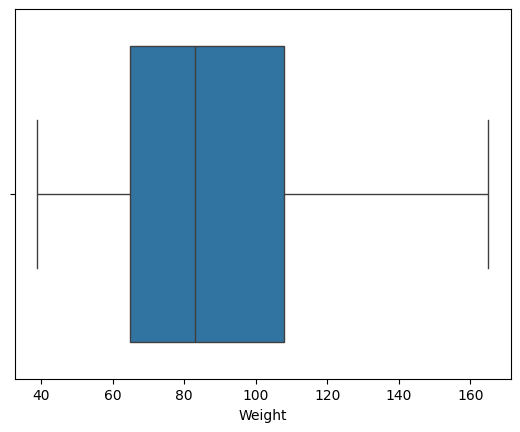

In [668]:
sns.boxplot(x=cleanedUsers['Weight'])
plt.savefig('assets/users/weight2.png')

Age

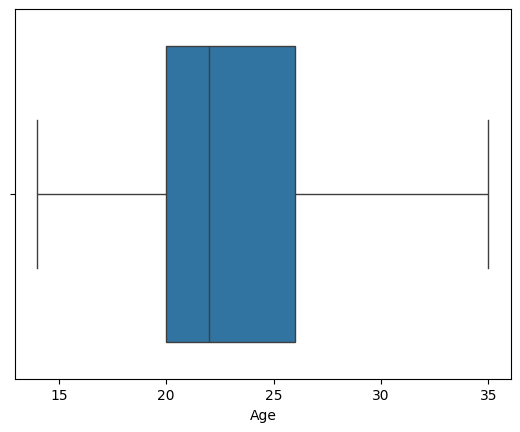

In [669]:
sns.boxplot(x=cleanedUsers['Age'])
plt.savefig('assets/users/age2.png')

Dari hasil di atas, sudah tidak terdapat nilai *outlier* pada setiap kolom dataset *users*. Maka data di atas sudah dapat digunakan untuk tahap selanjutnya.

## Penanganan Nilai *Outliers* Dataset Diet
Dari hasil pengulangan penerapan IQR yang sudah dilakukan, ternyata terdapat iterasi pengulangan tertentu yang dilakukan. Setelah kode di bawah, sudah tidak terdapat nilai *outliers* lagi pada dataset diet.

In [670]:
cleanedDiets.shape

(6795, 6)

Penerapan Rumus IQR dan Penghapusan Nilai *Outliers*

In [671]:
for i in range(0,8):
    numericalDiet = cleanedDiets.select_dtypes(include=['float64', 'int64'])
    outliers = iqrFormula(numericalDiet)
    cleanedDiets = cleanedDiets[~outliers.any(axis=1)]

In [672]:
cleanedDiets.shape

(5960, 6)

## Pengecekan Ulang Nilai *Outliers* Dataset Diet

Protein(g)

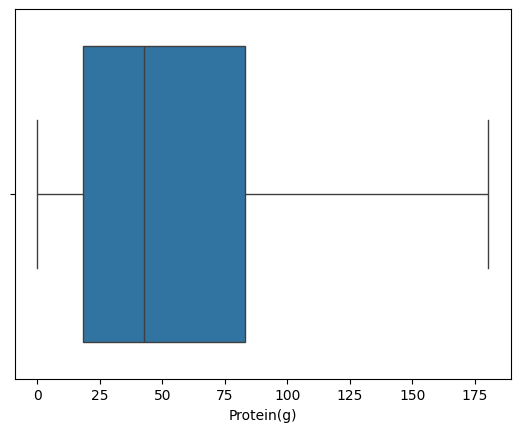

In [673]:
sns.boxplot(x=cleanedDiets['Protein(g)'])
plt.savefig('assets/diet/protein3.png')

Carbs(g)

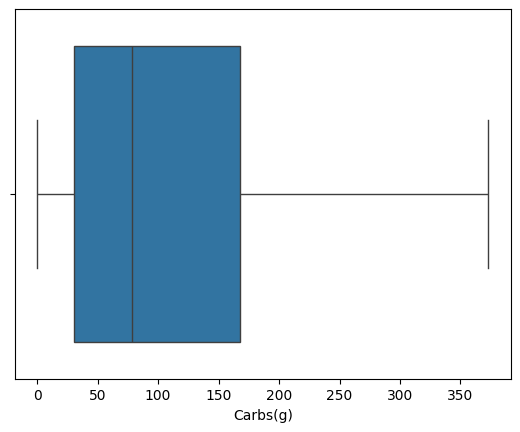

In [674]:
sns.boxplot(x=cleanedDiets['Carbs(g)'])
plt.savefig('assets/diet/carbs3.png')

Fat(g)

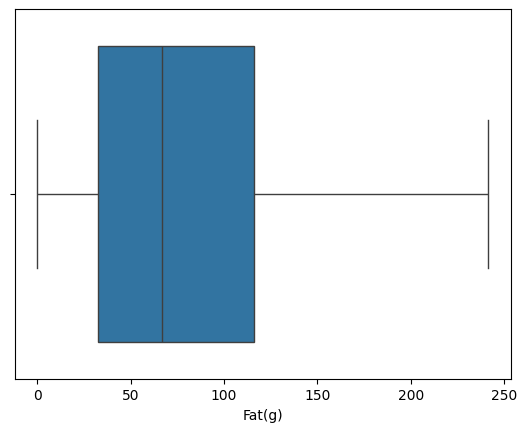

In [675]:
sns.boxplot(x=cleanedDiets['Fat(g)'])
plt.savefig('assets/diet/fat3.png')

Setelah melakukan **8** iterasi penerapan rumus IQR, terlihat bahwa sudah tidak terdapat nilai *outlier* dan data dapat digunakan pada tahap selanjutnya.